In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

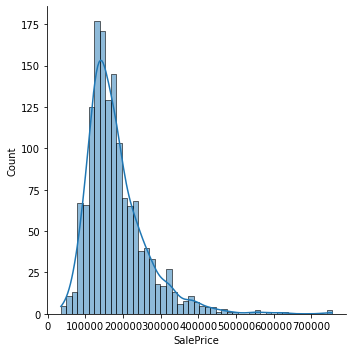

In [66]:

sns.displot(train_df['SalePrice'], kde=True);

Najtańsze mieszkanie kosztuje 34900, najdroższe 755000. Większość mieszkań znajduje się w przedziale między 100000 a 200000.

Sprawdźmy jaka jest zależność między powierzchnią a ceną.

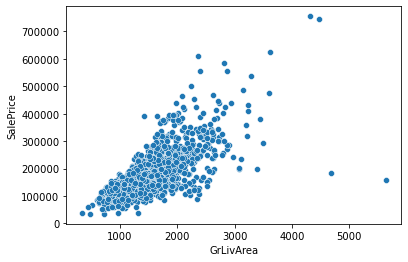

In [65]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df );

Razem z powierzchnią rośnie cena. Sprawdźmy czy powierzchnia piwnicy ma wpływ na cenę.

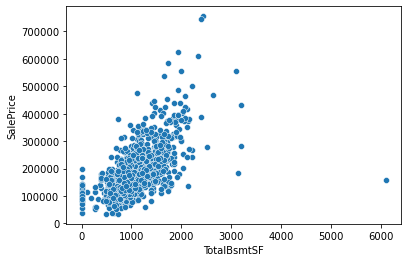

In [64]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df);

Podobnie jak z powierzchnią mieszkania cena rośnie wraz powierzchnią piwnicy.

Sprawdźmy jak się ma ocena wykończenia do ceny.

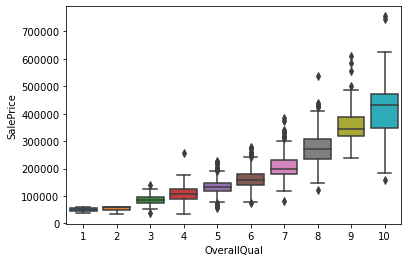

In [63]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df);

Widać wyraźnie, że wykończenie ma istotny wpływ na cenę.

Sprawdźmy wpływ roku budowy na cenę.

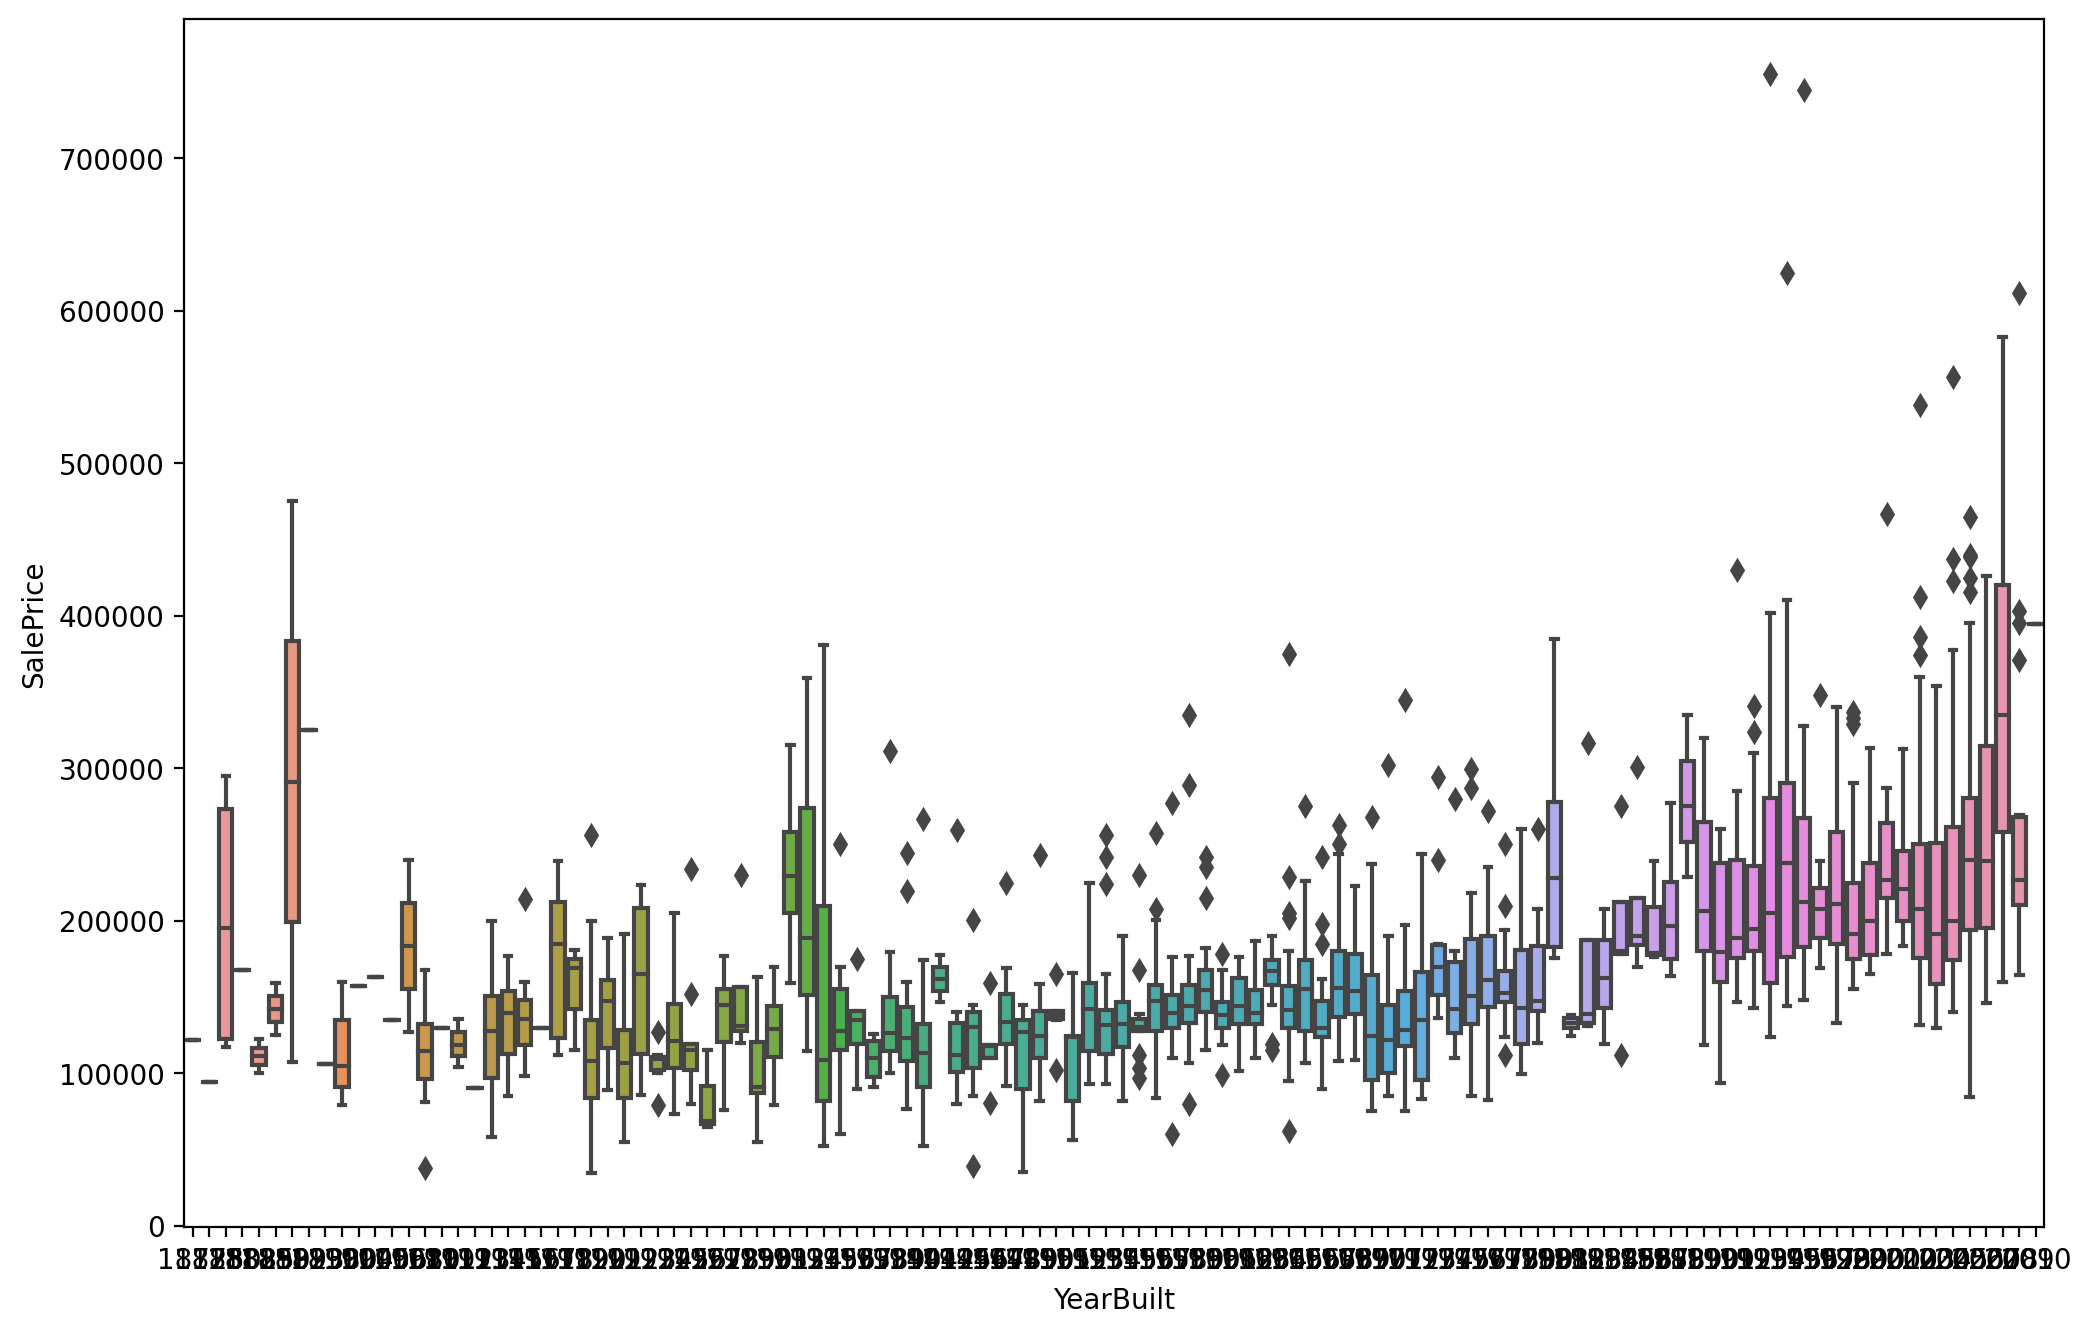

In [62]:
fig = plt.figure(figsize=(12,8), dpi=200)



sns.boxplot(x='YearBuilt', y='SalePrice', data=train_df);

Istnieje niewielki wzrost wartości dla nowszych budynków ale wyraźnie widać, że cena nie jest ściśle powiązana z rokiem budowy.

Wstępnie można stwierdzić, że powierzchnia i wykończenie mają znaczący wpływ na cenę domu. Jednak istnieje wiele innych zmiennych, które mogą mieć wpływ na cenę.

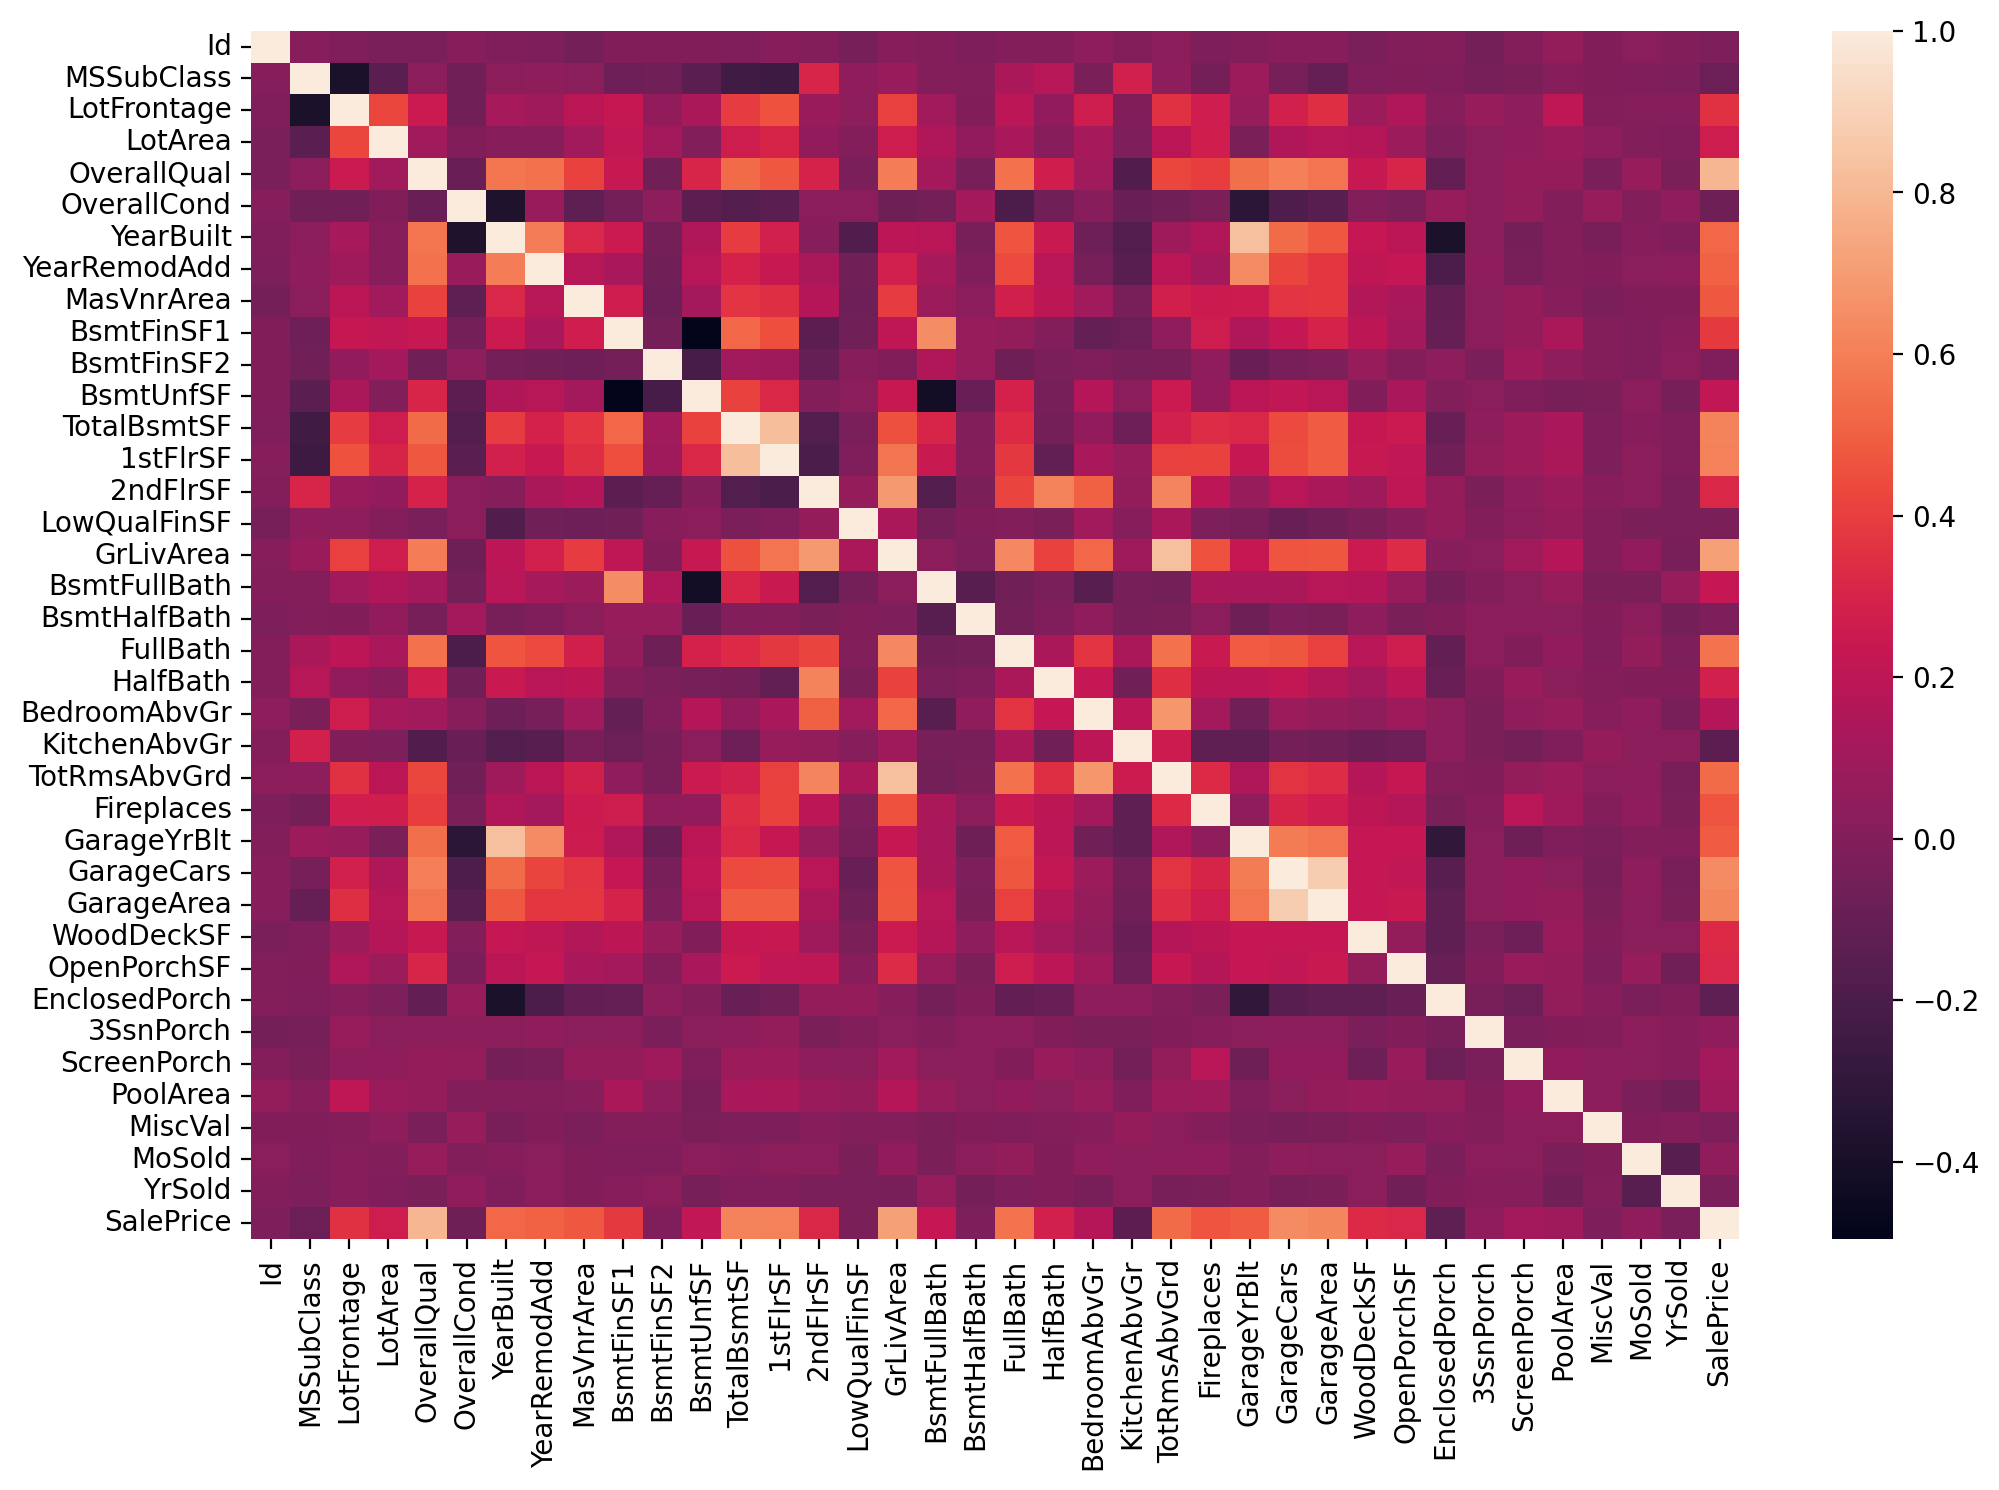

In [61]:
fig = plt.figure(figsize=(12,8), dpi = 200)
sns.heatmap(train_df.corr());

In [58]:
k = 10
correlation = train_df.corr().nlargest(k, 'SalePrice')['SalePrice']
correlation.drop('SalePrice', axis=0)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Wykończenie ma największy wpływ na cenę. Miejsca garażowe i powierzchnia garażu mają również bardzo duże znaczenie ale jako że są ze sobą powiązane wystarczy, że uwzględnimy jeden z nich.


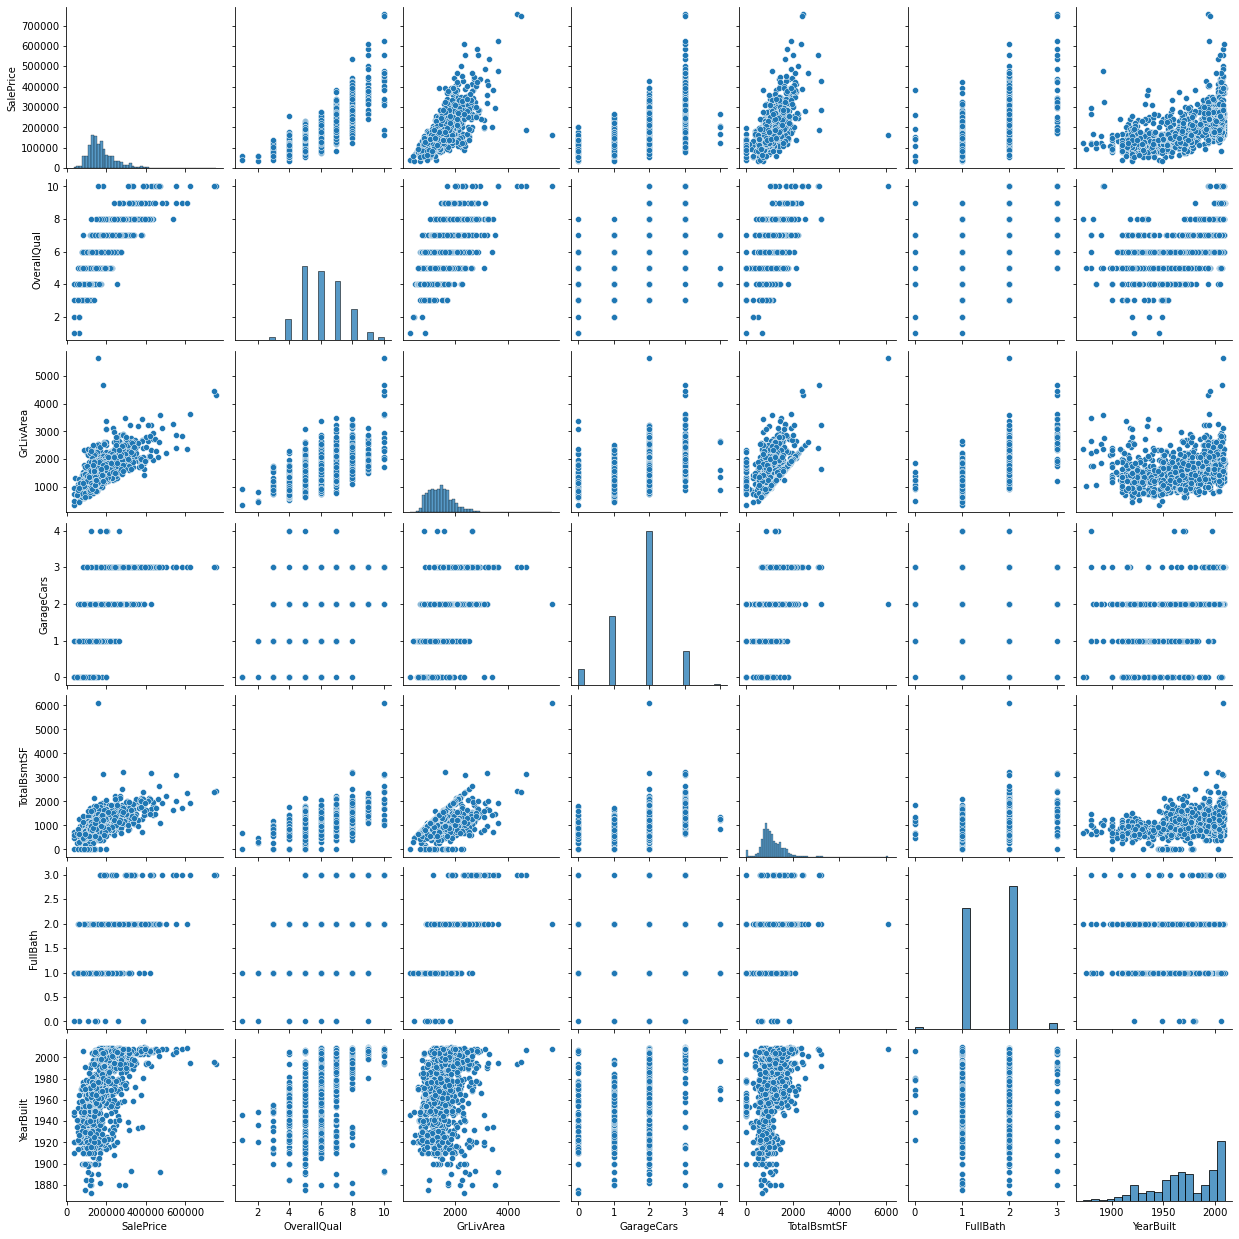

In [60]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols]);

Zajmijmy się brakującymi danymi


In [79]:
total = train_df.isnull().sum().sort_values(ascending=False).head(20)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False).head(20)
missing_data= pd.concat([total, percent], axis=1, keys=['suma', 'procent'])
missing_data

,suma,procent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Niekompletne zmienne nie mają istotnego wpływu na cenę nieruchomości i mogą zostać usunięte.

In [82]:
train_df.drop((missing_data[missing_data['suma'] > 1]).index,1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
